<a href="https://colab.research.google.com/github/vigneshkamatham/5502-Final-project/blob/main/project_titanic_disaster_checkpoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO 5502 ASSIGNMENT 08 DEVELOP A DATA ANALYSIS PROJECT**



**In this assignment, you pick your own questions and datasets to build
a data analysis project following data science workflow. Specifically, you need
complete the following tasks:
#**1. Develop a question of your choice that can be addressed by identifying,collecting, and analyzing relevant data. You need find relevant data by yourself, and describe the data such as the source, attributes, size, how the data were collected, is the dataset sample data or population data?, etc. The dataset should have at least six distinct variables (i.e. columns) and a sample size (i.e. rows) of 500 or more. (3 points)**


I decided to use titanic dataset for analysis. The data set is collected from kaggle.
The data set is available at https://www.kaggle.com/prkukunoor/TitanicDataset?select=titanic_data.csv


The dataset consists of 12 columns and 895 rows. 

A century has sailed by since the luxury steamship RMS Titanic met its catastrophic end in the North Atlantic, plunging two miles to the ocean floors after sideswiping an iceberg during its maiden voyage.Rather than the intended Port of New York, a deep-sea grave became the pride of the White Star Line’s final destination in the early hours of April 15, 1912.More than 1,500 people lost their lives in the disaster 








The data dictionary for the project is as follows

 id     Column         Dtype  
---  ------           -----  
 0   PassengerId    :   int64  
 
 1   Survived       :   int64  
 
 2   Pclass         :   int64  
 
 3   Name           :   object 
 
 4   Sex            :   object 
 
 5   Age            :  float64
 
 6   SibSp          :   int64  
 
 7   Parch          :   int64  
 
 8   Ticket         :   object 

 9   Fare           :  float64

 10  Cabin          :   object 
 
 11  Embarked       :   object 

**From my analysis we can explore**


**1) Which age group people are more likely to be survived**



**2) Which class of people (rich or poor) has the most survival rate?**


**In my analysis I am able to figure out with the given parameters if a person can survive or not**


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. selected data set : titanic_disaster (data is provided in folder)

In [ ]:
titanic_df = pd.read_csv('titanic.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Shape of data**

In [ ]:
print(titanic_df.shape)

(891, 12)


#**2. Perform exploratory data analysis (EDA). Describe the EDA process and result with at least four data visualizations. Explain whether the data is sufficient to answer the question you developed based on EDA result. If it is not sufficient, how did you address the issue?**

**Attribute**

In [ ]:
print(titanic_df.info())
print("Total Number attributes : "+str(len(titanic_df.columns)))
print("\nHere survived column is lable column other columns are feature columns\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
Total Number attributes : 12

Here survived column is lable column other columns are feature columns



**From the above analysis we can infer that the dataset consists of all the required colums. If we have any null values in the dataset we need to replace the null values with the most repeated value or the central tendancy measure. For the dimenasionality reduction we need to eliminate the columns which are not influencing the predicting variable**

# EDA : Explonatory data analysis

In [ ]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


d:\freelence\textprocessingengine\venv\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


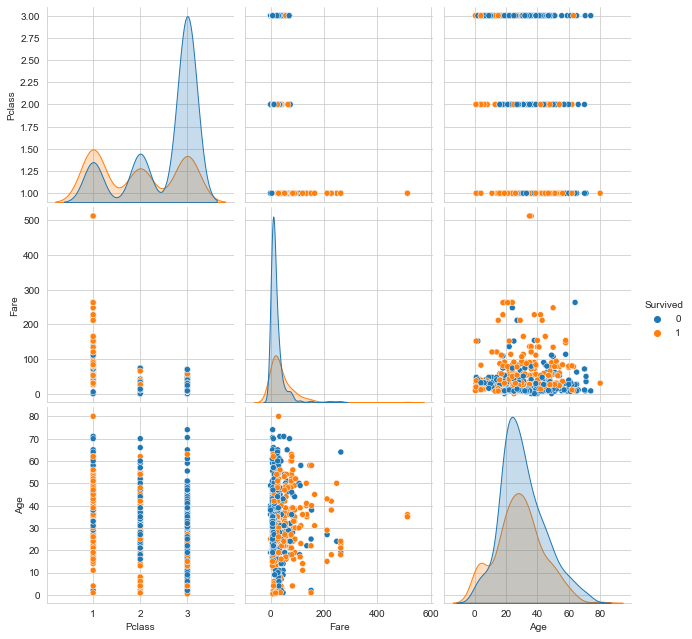

In [ ]:
# here we take only 4 features to  perform analysis.
sns.set_style("whitegrid");
sns.pairplot(titanic_df[["Survived","Pclass","Fare","Age"]], hue="Survived", size=3);
plt.show()

**From the above grid,** <br>
- **passengers : who paid higher fare or travelling in upper class has a higher chances to survive.**<br>
- **Age : young persons have a higher chance to survive than old peoples.**<br>

d:\freelence\textprocessingengine\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Survived', ylabel='count'>

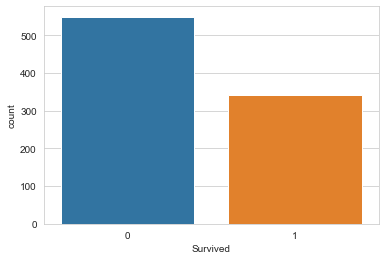

In [ ]:
# Countplot counts the each category of value and plot that.
sns.countplot(titanic_df['Survived'],data = titanic_df)

d:\freelence\textprocessingengine\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Pclass', ylabel='count'>

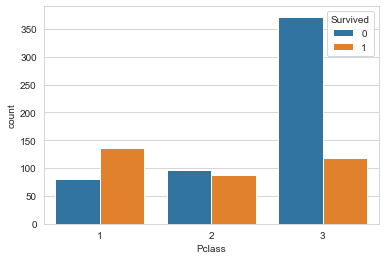

In [ ]:
sns.countplot(titanic_df["Pclass"],hue = titanic_df["Survived"],data = titanic_df)

- **Persons who were travelling in 3rd class , mostly of can not survived.**
- **Persons who were travelling in 2nd class, almost equal number of people not surviced and survived.**
- **Persons who were travelling in 1st class, large number of people survived.**

- **persons who were travelling in higher class like 1st has higher chance to survive.**

d:\freelence\textprocessingengine\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Sex', ylabel='count'>

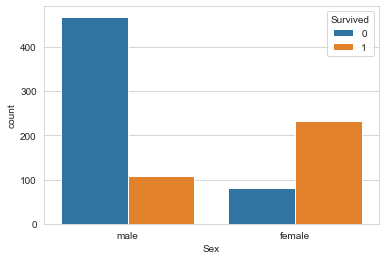

In [ ]:
sns.countplot(titanic_df["Sex"],hue = titanic_df["Survived"],data = titanic_df)

- **we can say male passenger has higher chances to die and female passengers has higher chance to survive**

**Replace the null values with 28**

d:\freelence\textprocessingengine\venv\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
d:\freelence\textprocessingengine\venv\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
d:\freelence\textprocessingengine\venv\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


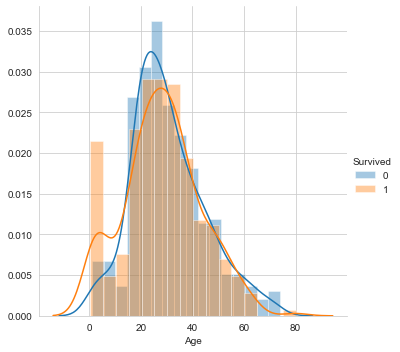

In [ ]:
# Filling null Values
data = titanic_df.fillna(28)
# plotting Pdfs
sns.FacetGrid(titanic_df, hue="Survived", size=5).map(sns.distplot, "Age").add_legend()
plt.show()

- **Passengers who have age <20 years so child's or teenagers , out of them numbers of passengers who survived is greater than numbers of people who died**
- **Persons who have age >20 years and <45 years. Out of them numbers of passengers who died is greater than numbers of passengers who survived.**
- **Rest of the pdfs are overlapping much so we will not struggle here much to get some info. But people with age greater then 65 almost all of them died**

d:\freelence\textprocessingengine\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='SibSp', ylabel='count'>

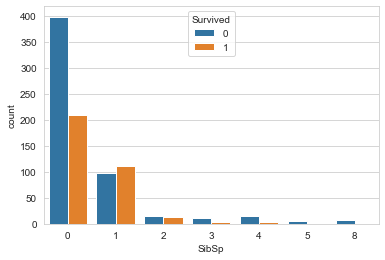

In [ ]:
sns.countplot(titanic_df["SibSp"],hue = titanic_df["Survived"],data = titanic_df)

- **Passengers who have 0 siblings mostly of them died.**
- **Passengers with 1 or 2 sibling has equally chance for both die and survive.**
- **But wait its interesting. passengers who have higher number of siblings like 3 , 4 , 5, 8 has a very low chance to survive or almost 0% chance to survive. But it should be high right.. because if I were on the titanic and have 4 , 5 or 8 siblings on titanic then chances of my survived.**

d:\freelence\textprocessingengine\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Parch', ylabel='count'>

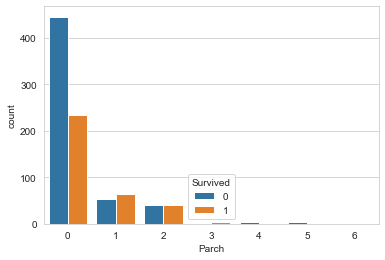

In [ ]:
sns.countplot(titanic_df["Parch"],hue = titanic_df["Survived"],data = titanic_df)

d:\freelence\textprocessingengine\venv\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
d:\freelence\textprocessingengine\venv\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
d:\freelence\textprocessingengine\venv\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


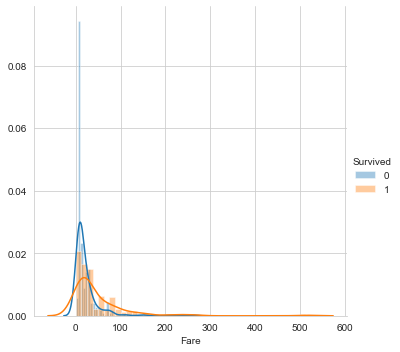

In [ ]:
sns.FacetGrid(titanic_df, hue="Survived", size=5) \
 .map(sns.distplot, "Fare") \
 .add_legend();
plt.show();

#**3) Describe any data cleaning or transformations that you perform and why they are motivated by your EDA?**

**A) I am eliminating the columns "PassengerId", "Name" , "Ticket" , "Cabin" which are not useful for prediction.**




**Passengers who paid low fair has a higher chances to die. On the other hand passengers who paid high fair has a higher chance to survive.**

d:\freelence\textprocessingengine\venv\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Embarked', ylabel='count'>

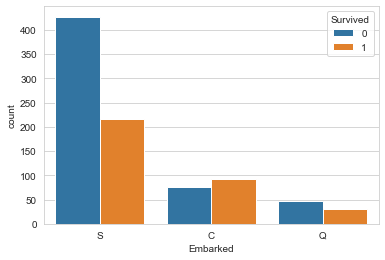

In [ ]:

sns.countplot(titanic_df["Embarked"],hue = titanic_df["Survived"],data = titanic_df)

**Data Cleaning and data transformation (categorical and continues data transformation)**

- **feature PassengerId and Passenger name,tickets these to features are not useful for prediction so its better to drop theme from dataset.**

In [ ]:
titanic_final_df = titanic_df.drop(["PassengerId", "Name" , "Ticket" , "Cabin"],axis = 1)
titanic_final_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


**Remove missing Values**

In [ ]:
feat_list = list(titanic_final_df.columns.values)

for feat in feat_list:
    print (feat,": ",sum(pd.isnull(titanic_final_df[feat])))

Survived :  0
Pclass :  0
Sex :  0
Age :  177
SibSp :  0
Parch :  0
Fare :  0
Embarked :  2


In [ ]:
titanic_final_df["Age"] = titanic_final_df["Age"].fillna(titanic_final_df["Age"].median())

In [ ]:
titanic_final_df["Embarked"].mode()

0    S
dtype: object

In [ ]:
titanic_final_df["Embarked"] = titanic_final_df["Embarked"].fillna("S")

**OneHotLabel encoding fr categorical data column**

In [ ]:
from sklearn.preprocessing import OneHotEncoder
# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')
# passing bridge-types-cat column (label encoded values of bridge_types)
enc_df = pd.DataFrame(enc.fit_transform(titanic_final_df[['Sex']]).toarray())
# merge with main df bridge_df on key values
titanic_final_df = titanic_final_df.join(enc_df)
titanic_final_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,0,1
0,0,3,male,22.0,1,0,7.2500,S,0.0,1.0
1,1,1,female,38.0,1,0,71.2833,C,1.0,0.0
2,1,3,female,26.0,0,0,7.9250,S,1.0,0.0
3,1,1,female,35.0,1,0,53.1000,S,1.0,0.0
4,0,3,male,35.0,0,0,8.0500,S,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,0.0,1.0
887,1,1,female,19.0,0,0,30.0000,S,1.0,0.0
888,0,3,female,28.0,1,2,23.4500,S,1.0,0.0
889,1,1,male,26.0,0,0,30.0000,C,0.0,1.0


In [ ]:
titanic_final_df=titanic_final_df.rename(columns={0: "Women", 1: "Men"}, errors="raise")

In [ ]:
titanic_final_df=titanic_final_df.drop('Sex', axis=1,)

**Age is continuous dimension so converting it in categorical using logical operation**

In [ ]:
# 0 is for child, 1 for adult and 2 for senior citizen
age_list = []
for data in titanic_final_df.Age:
    if(data<18):
        age_list.append(0)
    elif(data>18 and data<45):
        age_list.append(1)
    else:
        age_list.append(2)
titanic_final_df["age_labels"] =  age_list

- 0 : kids : 1 to 18
- 1 : adult : 18 to 45
- 2: senior citizen : greater than 45

In [ ]:
titanic_final_df = titanic_final_df.drop('Age', axis=1,)

In [ ]:
titanic_final_df["Embarked"][titanic_final_df["Embarked"] == "S"] = 1
titanic_final_df["Embarked"][titanic_final_df["Embarked"] == "C"] = 2
titanic_final_df["Embarked"][titanic_final_df["Embarked"] == "Q"] = 3

d:\freelence\textprocessingengine\venv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
d:\freelence\textprocessingengine\venv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
d:\freelence\textprocessingengine\venv\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This i

#**4)Apply relevant inference or predication methods such as linear regression or K-nearest neighborhood (KNN) to analyze your processed data, and validate the analysis results using cross-validation. Explain the training process, and the loss functions used in the analysis. Using examples (i.e. the values of the loss functions) to explain how the minimal value(s) of the loss function is/are found. (7 points)**

**Knn is one of the simplest machine learning algorithm**
**The predicted value is obtained by find the most nearest object to the classifier**
**Usually we use positive k value which represents the number of cluster**
**Example k = 3,5 or `0 etc.,**

# K-nearest neighborhood (KNN)

**Train Test Split**

**The X variable consists of all the attributes which are required for predicting Y**

In [ ]:
X = titanic_final_df.drop("Survived",axis=1,)

In [ ]:
y = titanic_final_df["Survived"]

**Split the dataset to training and testing where we use 80% of dataset for training and 20% dataset for testing the model**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

**KNN**

**Implement a k fold cross validation which is used to predict which k value is best for the analysis**
**The cross validation process is repeated k times with each of the sub samples and used exaclty once for validation data**
**Each observation is used for validation only once**
**Here I am running the analysis for values from 1,3,...50 the step count is 2**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.model_selection import cross_val_score
# make list of K for KNN
k_list = list(range(1,50,2))
cv_scores_list = []

# 10-fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    print("When K ="+ str(k) +" Score is :"+str(scores))
    cv_scores_list.append(scores.mean())

When K =1 Score is :[0.68333333 0.78333333 0.65       0.68333333 0.73333333 0.8
 0.74576271 0.74576271 0.69491525 0.77966102]
When K =3 Score is :[0.66666667 0.76666667 0.68333333 0.73333333 0.8        0.78333333
 0.6779661  0.72881356 0.66101695 0.79661017]
When K =5 Score is :[0.71666667 0.81666667 0.6        0.73333333 0.7        0.76666667
 0.6440678  0.77966102 0.6779661  0.74576271]
When K =7 Score is :[0.68333333 0.76666667 0.63333333 0.78333333 0.73333333 0.76666667
 0.74576271 0.74576271 0.71186441 0.77966102]
When K =9 Score is :[0.68333333 0.71666667 0.65       0.8        0.75       0.76666667
 0.77966102 0.77966102 0.6779661  0.77966102]
When K =11 Score is :[0.65       0.71666667 0.61666667 0.81666667 0.7        0.73333333
 0.74576271 0.76271186 0.69491525 0.77966102]
When K =13 Score is :[0.65       0.78333333 0.63333333 0.8        0.7        0.7
 0.77966102 0.76271186 0.66101695 0.81355932]
When K =15 Score is :[0.66666667 0.75       0.63333333 0.78333333 0.73333333 0.68

**Find the mean squared error and figure out which k is having the least MSE.**
**The value which has the least MSE is best for analysis**

In [ ]:
MSE = [1 - x for x in cv_scores_list]
print("LOSS MSE ")
print(MSE)
# finding best k
best_k_value = k_list[MSE.index(min(MSE))]
print("The best k = "+ str(best_k_value))
print("minnimum loss for best K = "+ str(min(MSE)))

LOSS MSE 
[0.27005649717514124, 0.27022598870056513, 0.2819209039548023, 0.2650282485875707, 0.26163841807909605, 0.278361581920904, 0.27163841807909606, 0.2766949152542374, 0.2900282485875707, 0.29005649717514126, 0.28663841807909607, 0.29672316384180797, 0.306864406779661, 0.3102542372881356, 0.3051694915254237, 0.3202824858757063, 0.31355932203389825, 0.30847457627118646, 0.3085310734463277, 0.3151977401129945, 0.32358757062146903, 0.3268926553672318, 0.33192090395480234, 0.3336158192090395, 0.33031073446327686]
The best k = 9
minnimum loss for best K = 0.26163841807909605


**Train Model and Test Model**

**Build a model with the best K value and predict the value of X_test**

In [ ]:
classifier = KNeighborsClassifier(n_neighbors=best_k_value)

# Fitting the model
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [ ]:
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[148,  18],
       [ 53,  76]], dtype=int64)

**Accuracy**

In [ ]:
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy  ' + str(round(accuracy, 2)) + ' %.')

Accuracy  75.93 %.


**We acheived a accuracy of 75.93%**

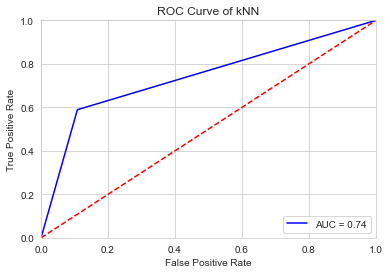

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
fpr, tpr, threshold = roc_curve(y_test,y_pred)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

#**5)Summarize and interpret your results including at least four data visualizations. Provide an evaluation of your approach and discuss any limitations of the methods you used.**

**A) The loss function is not used by KNN when we are training the dataset.**
**This doesnt imply there is no loss function for knn**

**Median minimizes the absolute difference loss. But we dont compute the mean absolute difference and we dont use optimizations for gradient descent to compute the median.**

**Similarly we implement a loss function, but knn minimizes the loss function**

**The problem with the outliers if the data set consists of more than 50% of outliers and if we drop all the values that will lead to huge loss of dataset and overfitting of model**

#**6)Write a project report to describe all tasks.**
**Steps involved in my analysis:**


**1) Data Extraction**

**Exploratory Data Analysis**

**2) Data Analysis**

**3) Data Cleaning**

**4) Data Analysis which includes visalizations**

END OF EDA

**5) Splitting the data to train and test**

**6) Find the best k value of k using k fold cross validation technique**

**7) Implement a knn model with the best K value and predict the out come of x_test**


**8) Find the accuracy of the prediction**

#**I created the notebook like the document and I am submitting the document by exporting this as PDF**